In [1]:
from alpaca_trade_api.rest import REST, TimeFrame
import pandas as pd

c:\Users\tempe\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecast import MCSimulation
from alpaca_trade_api.rest import REST, TimeFrame

%matplotlib inline

In [6]:
tradeapi = REST('ALPACA_API_KEY', 'ALPACA_SECRET_KEY')

In [9]:
def get_company(ticker, start, end, tradeapi):
    return tradeapi.get_barset(
        ticker,
        TimeFrame.Day,
        start,
        end
    ).df

In [10]:
my_df = {
    "MSFT":get_company("MSFT", "2022-01-01", "2022-03-18", tradeapi),
    "ENPH":get_company("ENPH", "2022-01-01", "2022-03-18", tradeapi)
}

HTTPError: 403 Client Error: Forbidden for url: https://data.alpaca.markets/v1/bars/1Day?symbols=MSFT&limit=2022-01-01&start=2022-03-18

In [34]:
full_data = pd.concat(my_df.values(), keys=my_df.keys(), axis="columns")
full_data.head()

MSFT                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-01-03 05:00:00+00:00  335.15  338.00  329.78  334.75  28900038   
2022-01-04 05:00:00+00:00  334.50  335.20  326.12  329.01  32663003   
2022-01-05 05:00:00+00:00  325.72  326.07  315.98  316.38  39999531   
2022-01-06 05:00:00+00:00  312.63  318.70  311.49  313.88  39788932   
2022-01-07 05:00:00+00:00  313.83  316.50  310.09  314.04  32686013   

                                                     ENPH                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-01-03 05:00:00+00:00      394909  333.380091  185.24  187.58  180.70   
2022-01-04 05:00:00+00:00      517781  329.447177  187.41  188.00  171.30   
2022-01-05 05:00:00+00:00      639227  320.028581  174.46  174.85  156.76   
2022-01-06 05:00:00+00:00      626726  315.214679  155.75  156.23  145.82   
2022-01-07 05:00:00+00:00      499166  313.782097  151.68  154.95  144.17   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-01-03 05:00:00+00:00  184.45  1489915       38777  183.934653  
2022-01-04 05:00:00+00:00  178.28  2483817       67268  176.204883  
2022-01-05 05:00:00+00:00  157.20  4057182       96167  163.026256  
2022-01-06 05:00:00+00:00  151.49  3542843       77187  152.098572  
2022-01-07 05:00:00+00:00  145.13  3562134       72370  146.930987

In [35]:
from MCForecastTools import MCSimulation

In [36]:
MCSim = MCSimulation(
    full_data,
    weights = [30, 70],
    num_simulation=100,
    num_trading_days=10)

In [37]:
MCSim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-2.037634,-2.829426,-3.545236,0.414672,-2.612322,-0.672759,5.557562,-1.531492,-4.081350,3.948082,...,-1.425003,4.269738,1.924297,6.046001,3.380909,-1.664576,2.525253,2.849466,0.123719,-0.688327
2,-12.665663,-24.470875,5.168003,-0.962997,-14.213181,0.681719,4.412606,-2.004503,-2.708635,-10.174928,...,-8.802197,-4.604274,1.185082,16.325988,-5.218770,-6.932714,8.329287,10.609595,-0.286376,-7.262787
3,35.251319,-46.614045,38.895758,-3.324014,-5.920231,2.907548,14.889124,-5.282349,4.213945,62.681139,...,-32.049708,31.447818,-6.774553,22.752608,-9.140636,2.702701,-43.979740,60.949340,1.465374,-19.604497
4,-106.458810,-212.981515,-27.341459,13.657265,10.396415,14.637831,-82.824243,-8.775544,13.821490,-292.184172,...,52.334243,4.761353,-16.886962,-27.996017,-67.134413,-3.096313,-93.073397,-238.307370,4.272965,-80.728175
5,-604.375445,-1274.713055,-43.509599,12.878709,62.779085,-13.259176,24.054554,32.790472,49.966680,-192.859684,...,338.587977,6.301094,47.853015,-174.933428,-283.220173,-12.724464,10.191741,462.580464,7.648025,-44.616114
6,-413.093707,-6205.278372,-265.896136,35.498405,116.873089,40.552190,-82.678825,160.838119,-203.050038,-1307.813712,...,256.478662,7.683393,-145.112700,-667.229345,1284.823225,-68.177978,15.828926,-503.115010,-29.951166,-113.820490
7,-3993.297678,-41623.359152,695.349581,239.638616,535.494051,121.371574,-102.393135,-64.360741,594.627766,-6364.464312,...,-660.968269,-12.385486,880.776649,-75.137340,-6685.246913,-136.440244,-85.757892,-3222.379014,114.619543,298.656088
8,8902.783341,-34903.339515,2235.993825,3.094343,-3071.628335,359.676483,-243.233449,-101.327704,1944.661349,2944.593209,...,-2243.806605,-15.002911,2533.110158,-256.039534,-1530.549831,-440.815581,-222.994245,-12582.687902,13.189954,1872.631787
9,2582.828692,52538.920042,10304.288351,-19.361532,-11001.912583,-2484.018444,374.268636,85.300009,223.793574,29308.715598,...,7623.301621,-132.125598,-713.409546,-860.050782,-291.209002,678.583305,-1297.568251,9668.320963,104.460743,820.602171


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 10 Trading Days.'}>

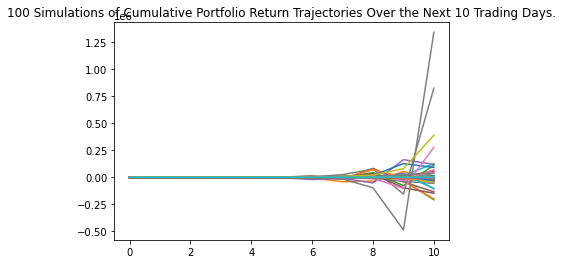

In [38]:
MCSim.plot_simulation()